In [138]:
import numpy as np
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [139]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [140]:
data = pd.read_csv('./data/bioresponse.csv', header=0, sep=',')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [141]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 

from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [143]:
feats = data.drop("Activity", axis=1)
target = data["Activity"]

In [144]:
train_x, test_x, train_y, test_y = train_test_split(feats, target, train_size = .3, random_state = 1)

# reshaping data
# train_x, test_x, train_y, test_y = np.asarray(train_x).T, np.asarray(test_x).T, np.asarray(train_y).T, np.asarray(test_y).T
# train_x, test_x, train_y, test_y = np.asarray(train_x), np.asarray(test_x), np.asarray(train_y), np.asarray(test_y)
# train_x, test_x, train_y, test_y = np.asarray(train_x), np.asarray(test_x), np.asarray(train_y), np.asarray(test_y)

*   Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 

In [145]:
# activate function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1./(1. + np.exp(-z))
    
    return s

In [146]:
# initialize weights and bias with zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [147]:
# propagation

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]
    # print('number of objects = ', len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
    cost = -(1./m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1)   # compute cost
    # print(A)
    # print(np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m) * np.dot(X, (A-Y).T)
    db = (1./m) * np.sum(A-Y, axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [148]:
# initializing parameters

# w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
# w, b, X, Y = np.ones((train_x.shape[1], 1)), 4., train_x.T, train_y
# w, b, X, Y = np.random.rand(train_x.shape[1], 1), 4., train_x.T, train_y
w, b, X, Y = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4., np.asarray(train_x).T, np.asarray(train_y)

grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[-0.03931852]
 [-0.33046485]
 [-0.04613333]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [-0.55111111]
cost = [43.59691837]


In [149]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        costs.append(cost)
        
        # # Record the costs
        # if i % 100 == 0:
        #     costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [150]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 43.596918
Cost after iteration 100: 34.821550
Cost after iteration 200: 26.046262
Cost after iteration 300: 17.333547
Cost after iteration 400: 11.479331
Cost after iteration 500: 9.417837
Cost after iteration 600: 8.301273
Cost after iteration 700: 7.366989
Cost after iteration 800: 6.544504
Cost after iteration 900: 5.844623
w = [[-0.8819335 ]
 [-0.32944062]
 [-0.85217893]
 ...
 [-0.9733567 ]
 [-0.92001057]
 [ 0.04444401]]
b = [5.01239803]
dw = [[-0.01093747]
 [ 0.00577469]
 [-0.0153221 ]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [0.04064678]


In [151]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    return Y_prediction

In [152]:
# w = np.array([[0.1124579], [0.23106775]])
w = np.random.rand(np.asarray(train_x).shape[1], 1)
b = -0.3
# X = np.array([[1.,-1.1,-3.2], [1.2,2.,0.1]])
X = train_x.T
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 1. ... 1. 1. 1.]]


*   Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.

In [153]:
# optimize sgd

def optimize2(w, b, train_x, train_y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """

    X = pd.DataFrame(train_x)
    Y = pd.DataFrame(train_y)
    XY = X.join(Y)

    costs = []
    
    for i in range(num_iterations):

        # choose randomly the number
        # rand = np.random.randint(0, X.shape[1] - 10)
        rand = np.random.randint(0, X.shape[0])
        XYs = XY.sample(rand)

        Xs = XYs.loc[:, XYs.columns != 'Activity']
        Ys = XYs["Activity"]

        Xs = np.asarray(Xs)
        Ys = np.asarray(Ys)
        
        # Cost and gradient calculation (with random data)
        # grads, cost = propagate(w, b, X[rand, :].reshape(1, -1), Y[rand])
        # grads, cost = propagate(w, b, X[rand:rand + 10].reshape(1, -1), Y[rand:rand + 10])
        grads, cost = propagate(w, b, Xs.T, Ys)
        # grads, cost = propagate(w, b, X[:, rand:rand], Y[rand:rand])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        costs.append(cost)
        # # Record the costs
        # if i % 100 == 0:
        #     costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [154]:
m = X.shape[1]
A = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
cost = -(1./m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1)   # compute cost

c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
# W = pd.DataFrame(w, columns=['w'])
# # W[ (W['w'] > -0.001) & (W['w'] < 0.001) ]
# W[ W['w'] == -1 ]

In [156]:
# w, b = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4.
w, b = np.random.uniform(-1, 1, size=(train_x.shape[1], 1)), 1.
params, grads, costs = optimize2(w, b, train_x, train_y, num_iterations = 1000, learning_rate = 0.05, print_cost = True)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

Cost after iteration 0: 3.510864
Cost after iteration 100: 1.146034
Cost after iteration 200: 1.035767
Cost after iteration 300: 0.917650
Cost after iteration 400: 0.784734
Cost after iteration 500: 0.564972
Cost after iteration 600: 0.664297
Cost after iteration 700: 0.633261
Cost after iteration 800: 0.469154
Cost after iteration 900: 0.571285
w = [[-0.1515055 ]
 [-0.67733342]
 [-0.12322113]
 ...
 [ 0.31976514]
 [-0.80610795]
 [-0.12463739]]
b = [1.02241072]
dw = [[ 2.90764391e-04]
 [-1.14980619e-02]
 [ 2.28755198e-04]
 ...
 [ 1.50875777e-03]
 [-8.49474547e-04]
 [-3.44991344e-05]]
db = [-0.01167619]


*   For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

In [157]:
# optimize 1
w, b, X, Y = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 3., np.asarray(train_x).T, np.asarray(train_y)
params1, grads1, costs1 = optimize(w, b, X, Y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params1["w"]))
print ("b = " + str(params1["b"]))
print ("dw = " + str(grads1["dw"]))
print ("db = " + str(grads1["db"]))

Cost after iteration 0: 42.607771
Cost after iteration 100: 33.832415
Cost after iteration 200: 25.057270
Cost after iteration 300: 16.388590
Cost after iteration 400: 10.778962
Cost after iteration 500: 8.885856
Cost after iteration 600: 7.802621
Cost after iteration 700: 6.906223
Cost after iteration 800: 6.153890
Cost after iteration 900: 5.557238
w = [[ 0.11647055]
 [ 0.664317  ]
 [-0.8542713 ]
 ...
 [ 0.02666695]
 [-0.92001057]
 [-0.95553493]]
b = [4.00335782]
dw = [[-0.01014646]
 [ 0.00736699]
 [-0.0137671 ]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [0.04260051]


In [158]:
# optimize 2
# w, b = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4.
# w, b = np.random.randn(-1, 1, size=(train_x.shape[1], 1)), 4.
# w, b = np.random.rand(train_x.shape[1], 1)*10, 4.
w, b = np.random.uniform(-1, 1, size=(train_x.shape[1], 1)), 3.
params2, grads2, costs2 = optimize2(w, b, train_x, train_y, num_iterations = 1000, learning_rate = 0.0005, print_cost = True)

print("w = " + str(params2["w"]))
print("b = " + str(params2["b"]))
print("dw = " + str(grads2["dw"]))
print("db = " + str(grads2["db"]))

c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: nan
Cost after iteration 100: 2.978581
Cost after iteration 200: 2.945052
Cost after iteration 300: 2.359413
Cost after iteration 400: 2.366959
Cost after iteration 500: 2.597398
Cost after iteration 600: 2.371014
Cost after iteration 700: 2.618578
Cost after iteration 800: 2.453582
Cost after iteration 900: 0.731088
w = [[-0.4566054 ]
 [ 0.31755159]
 [ 0.44593392]
 ...
 [-0.50732922]
 [ 0.50314944]
 [-0.59475409]]
b = [2.92813768]
dw = [[ 8.87225183e-03]
 [ 3.10016503e-03]
 [ 5.39143111e-04]
 ...
 [-7.14366208e-13]
 [ 2.55101418e-03]
 [-4.11988886e-06]]
db = [0.01521987]


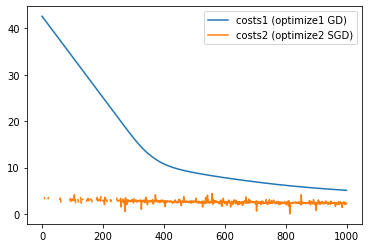

In [159]:
plt.plot(costs1)
plt.plot(costs2)
plt.legend(['costs1 (optimize1 GD)','costs2 (optimize2 SGD)'])
plt.show()

- Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms

In [248]:
feats = data.drop("Activity", axis=1).to_numpy()
target = data["Activity"].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(feats, target, train_size = .4, random_state = 1)

In [249]:
# optimize Adam

def optimize_adam(w, b, X, Y, num_iterations=1000, learning_rate=0.005,
                  b_1=0.3, b_2=0.999, eps=1e-8, batch_size=5, print_cost=False):
    costs = []

    #Initialization of the parameters for Adam optimizer
    v, s = 0, 0
    dw, db = None, None
    batch_size = min(X.shape[1], batch_size)

    for i in range(num_iterations):
        #batch selection
        batch_ids = np.random.choice(X.shape[1], batch_size, replace=False)
        sub_x = X[:, batch_ids]
        sub_y = Y[batch_ids]

        grads, cost = propagate(w, b, sub_x, sub_y)

        # For loss result
        _, cost_j = propagate(w, b, X, Y)

        dw, db = grads["dw"], grads["db"]
        full_grad = np.concatenate((dw, db.reshape(1, 1)))

        v = b_1 * v + (1 - b_1) * full_grad
        s = b_2 * s + (1 - b_2) * np.sum(full_grad**2)

        w -= learning_rate / (np.sqrt(s) + eps) * v[:-1]
        b -= learning_rate / (np.sqrt(s) + eps) * v[1]

        costs.append(cost_j)

        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost_j}")

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [250]:
w, b = initialize_with_zeros(train_x.shape[1])

params_adam, grads_adam, costs_adam = optimize_adam(w, b, train_x.T, train_y)

print("w = " + str(params_adam["w"]))
print("b = " + str(params_adam["b"]))
print("dw = " + str(grads_adam["dw"]))
print("db = " + str(grads_adam["db"]))

w = [[-0.00894203]
 [ 0.00333698]
 [ 0.01360642]
 ...
 [-0.0029841 ]
 [ 0.01307993]
 [ 0.00265505]]
b = [0.00333698]
dw = [[0.00365448]
 [0.06021599]
 [0.00634664]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
db = [0.14691306]


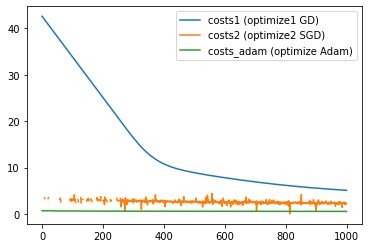

In [252]:
plt.plot(costs1)
plt.plot(costs2)
plt.plot(costs_adam)
plt.legend(['costs1 (optimize1 GD)','costs2 (optimize2 SGD)', 'costs_adam (optimize Adam)'])
plt.show()